# Практическая работа 3

In [7]:
import warnings

warnings.filterwarnings("ignore")

Загрузить данные из файла `insurance.csv`.

In [1]:
import pandas as pd

db = pd.read_csv('insurance.csv')
db

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


С помощью метода `describe()` посмотреть статистику по данным.
Сделать выводы.

Метод `describe()` возвращает описание данных, содержащихся в объекте DataFrame.
Если объект содержит числовые показатели, для каждого такого столбца описание содержит:

- `count` — число найденных ненулевых значений в столбце;
- `mean` — среднее значение по всему столбцу;
- `std` — стандартное отклонение (standard deviation) по всему столбцу;
- `min` — минимальное значение среди всех в столбце;
- `25%`, `50%`, `75%` — 25%-ый, 50%-ый и 75%-ый процентиль* соответственно;
- `max` — максимальное значение среди всех в столбце.

*Процентиль — значение, которое заданная случайная величина не превышает
с фиксированной вероятностью, заданной в процентах.

In [2]:
db.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Таким образом, числовыми показателями в датафрейме по страхованию являются:
- возраст (`age`),
- индекс массы тела (`bmi`),
- число детей (`children`),
- расходы (`charges`).

Также, нет значений в каждом из столбцов, которые бы являлись нулевыми либо неопределенными.

Найти меры центральной тенденции и меры разброса для индекса массы тела (`bmi`) и расходов (`charges`).
Отобразить результаты в виде текста. Сделать выводы.

# Одним числом данные можно описать несколькими способами:
- ## Меры центральной тенденции:
    - ### Мода (*самая надежная, или робастная*)
        - значение, которое наиболее часто встречается в выборке.
    - ### Медиана — это:
        - для **нечетного числа** элементов — центральный элемент отсортированного массива;
        - для **четного числа** элементов — среднее двух центральных элементов отсортированного массива.
    - ### Среднее (*не устойчиво к выбросам*)
        - сумма значений всех элементов выборки, деленное на их количество.

- ## Меры изменчивости (разброса):
    - ### Размах
        - разница между максимальным и минимальным значением выборки.
    - ### Межквартильный размах (IQR) (*устойчива к выбросам*)
        - метрика, полезная для описания данных:
            - ширина интервала, содержащего 50% данных;
            - разность между квартилями Q3 (75%) и Q1 (25%).

    - ### Стандартное отклонение (*не устойчиво к выбросам*)
        - корень из дисперсии, который позволяет оценить, как сильно меняются данные относительно их среднего.


In [4]:
import numpy as np
import scipy.stats as sts

In [8]:
bmi_mean = np.mean(db['bmi'])
bmi_median = np.median(db['bmi'])
bmi_mode = sts.mode(db['bmi']).mode[0]

bmi_std = db['bmi'].std()
bmi_raz = np.ptp(db['bmi'])
bmi_iqr = sts.iqr(db['bmi'], interpolation='midpoint')

print(
    'Меры центральной тенденции [`bmi`]: ',
    f'  - Среднее = {bmi_mean}',
    f'  - Медиана = {bmi_median}',
    f'  - Мода = {bmi_mode}',
    'Меры изменчивости (разброса) [`bmi`]: ',
    f'  - Стандартное отклонение = {bmi_std}',
    f'  - Межквартильный размах = {bmi_iqr}',
    f'  - Размах = {bmi_raz}',
sep='\n')

Меры центральной тенденции [`bmi`]: 
  - Среднее = 30.66339686098655
  - Медиана = 30.4
  - Мода = 32.3
Меры изменчивости (разброса) [`bmi`]: 
  - Стандартное отклонение = 6.098186911679014
  - Межквартильный размах = 8.384999999999998
  - Размах = 37.17


In [9]:
chrg_mean = np.mean(db['charges'])
chrg_median = np.median(db['charges'])
chrg_mode = sts.mode(db['charges']).mode[0]

chrg_std = db['charges'].std()
chrg_raz = np.ptp(db['charges'])
chrg_iqr = sts.iqr(db['charges'], interpolation='midpoint')

print(
    'Меры центральной тенденции [`charges`]: ',
    f'  - Среднее = {chrg_mean}',
    f'  - Медиана = {chrg_median}',
    f'  - Мода = {chrg_mode}',
    'Меры изменчивости (разброса) [`charges`]: ',
    f'  - Стандартное отклонение = {chrg_std}',
    f'  - Межквартильный размах = {chrg_iqr}',
    f'  - Размах = {chrg_raz}',
sep='\n')

Меры центральной тенденции [`charges`]: 
  - Среднее = 13270.422265141257
  - Медиана = 9382.033
  - Мода = 1639.5631
Меры изменчивости (разброса) [`charges`]: 
  - Стандартное отклонение = 12110.011236694001
  - Межквартильный размах = 11879.80148
  - Размах = 62648.554110000005


Построить гистограммы для числовых показателей.
Отобразить результаты на гистограммах (3 вертикальные линии). Добавить легенду на графики.
Сделать выводы.

In [11]:
import matplotlib.pyplot as plt

%matplotlib notebook

In [12]:
fig, ((age, bmi), (chld, chrg)) = plt.subplots(2, 2, figsize=(12.8, 12))

fig.subplots_adjust(0.065, 0.05, 0.975, 0.915)
fig.suptitle('Гистограммы частот для числовых показателей', fontsize=20, weight='bold')

age.hist(
    x=db['age'], edgecolor='black', color='crimson',
    bins=20, label='Число интервалов — 20',
)
age.set_title('Частота по возрасту', fontsize=16)
age.set_xlabel('Числовое значение возраста')
age.set_ylabel('Высчитанная частота')
age.set_axisbelow(True)
age.grid(axis='both')
age.legend()

bmi.hist(
    x=db['bmi'], edgecolor='black', color='gold',
    bins=20, label='Число интервалов — 20',
)
bmi.axvline(x=bmi_mean, color='lightgreen', label=f'Среднее = {round(bmi_mean, 4)}')
bmi.axvline(x=bmi_median, color='olive', label=f'Медиана = {round(bmi_median, 4)}')
bmi.axvline(x=bmi_mode, color='green', label=f'Мода = {round(bmi_mode, 4)}')

bmi.set_title('Частота по индексу массы тела', fontsize=16)
bmi.set_xlabel('Числовое значение индекса массы тела')
bmi.set_ylabel('Высчитанная частота')
bmi.set_axisbelow(True)
bmi.grid(axis='both')
bmi.legend()

chld.hist(
    x=db['children'], edgecolor='black', color='lightgreen',
    bins=6, label='Число интервалов — 6',
)
chld.set_title('Частота по числу детей', fontsize=16)
chld.set_ylabel('Высчитанная частота')
chld.set_xlabel('Число детей')
chld.set_axisbelow(True)
chld.grid(axis='both')
chld.legend()

chrg.hist(
    x=db['charges'], edgecolor='black', color='skyblue',
    bins=10, label='Число интервалов — 10',
)
chrg.axvline(x=chrg_mean, color='red', label=f'Среднее = {round(chrg_mean, 4)}')
chrg.axvline(x=chrg_median, color='crimson', label=f'Медиана = {round(chrg_median, 4)}')
chrg.axvline(x=chrg_mode, color='pink', label=f'Мода = {round(chrg_mode, 4)}')

chrg.set_title('Частота по расходам', fontsize=16)
chrg.set_xlabel('Числовое значение расходов')
chrg.set_ylabel('Высчитанная частота')
chrg.set_axisbelow(True)
chrg.grid(axis='both')
chrg.legend()


<IPython.core.display.Javascript object>

Чаще всего страхуются люди в возрасте от 18 до 21 года, с возрастом частота падает почти в 2,5 раза с пиками примерно в:
26 лет, 33 года, 42 года, 48 лет, 56 лет и 63 года.

Чаще всего страхуются люди с показателем индекса массы тела, составляющим 32,3.
Также очень часто страхуются люди с индексом массы тела от 25 до 35.
Средний показатель индекса массы тела страхующихся людей — 30,5.

С ростом числа детей, люди страхуются все меньше и меньше.
При этом, частота страхующихся людей резко падает по достижении 1-го ребенка, затем при достижении 4-х детей.

Чем ниже расходы людей, тем чаще они страхуются, при этом частота резко падает, начиная с дохода в 10'300 единиц, а затем падает почти равномерно.

Построить box-plot для числовых показателей.
Названия графиков должны соответствовать названиям признаков.
Сделать выводы.

Оранжевая линия – это медиана, или `Q2`.

Границы коробки – это квартили `Q1` и `Q3`, то есть 50% выборки находится в этом диапазоне.

Точки за пределами «усов» – это выбросы.

Границы усов – это `Q1 – (1.5 * IQR)` и `Q3 + (1.5 * IQR)`.
Еще один способ указания границ усов – это максимум и минимум выборки, тогда выбросов на такой диаграмме нет.


In [13]:
fig, ((age, bmi), (chld, chrg)) = plt.subplots(2, 2, figsize=(12.8, 12))

fig.subplots_adjust(0.065, 0.05, 0.975, 0.915)
fig.suptitle('"Коробки с усами" для числовых показателей', fontsize=20, weight='bold')

temp = age.boxplot(
    x=db['age'], labels=['Возраст'], patch_artist=True, meanline=True,
    showbox=True, showmeans=True, showcaps=True, showfliers=True,
)
[patch.set_facecolor(color) for patch, color in zip(temp['boxes'], ['crimson'])]

age.set_title('Диаграмма для возраста', fontsize=16)
age.set_ylabel('Числовое значение возраста')
age.set_axisbelow(True)
age.grid(axis='y')

temp = bmi.boxplot(
    x=db['bmi'], labels=['Индекс массы тела'], patch_artist=True, meanline=True,
    showbox=True, showmeans=True, showcaps=True, showfliers=True,
)
[patch.set_facecolor(color) for patch, color in zip(temp['boxes'], ['gold'])]

bmi.set_title('Диаграмма для индекса массы тела', fontsize=16)
bmi.set_ylabel('Числовое значение индекса массы тела')
bmi.set_axisbelow(True)
bmi.grid(axis='y')

temp = chld.boxplot(
    x=db['children'], labels=['Дети'], patch_artist=True, meanline=True,
    showbox=True, showmeans=True, showcaps=True, showfliers=True,
)
[patch.set_facecolor(color) for patch, color in zip(temp['boxes'], ['lightgreen'])]

chld.set_title('Диаграмма для числа детей', fontsize=16)
chld.set_ylabel('Число детей')
chld.set_axisbelow(True)
chld.grid(axis='y')

temp = chrg.boxplot(
    x=db['charges'], labels=['Расходы'], patch_artist=True, meanline=True,
    showbox=True, showmeans=True, showcaps=True, showfliers=True,
)
[patch.set_facecolor(color) for patch, color in zip(temp['boxes'], ['skyblue'])]

chrg.set_title('Диаграмма для расходов', fontsize=16)
chrg.set_ylabel('Числовое значение расходов')
chrg.set_axisbelow(True)
chrg.grid(axis='y')


<IPython.core.display.Javascript object>

Медианой возраста является значение в ~39 лет.
50% выборки находится в пределах от ~27 до ~51 года.
Диаграмма по возрасту не содержит выбросов.

Медианой индекса массы тела оказалось значение, похожее на ранее найденное — 30,4.
50% выборки находится в пределах от ~26 до ~34,5 единиц индекса массы тела.
Диаграмма по индексу массы тела содержит небольшое число выбросов.

Медианой числа детей является значение в ровно 1 ребенка, а 50% выборки находится в пределах от 0 до 2 детей.
Диаграмма по числу детей не содержит выбросов.

Медианой числа расходов оказалось значение, похожее на ранее найденное — 9382,033.
50% выборки находится в пределах от ~5'000 до ~16'000 единиц расходов.
Диаграмма по числу расходов содержит большое число выбросов.


Используя признак `charges` или `bmi`, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n.
Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений.
Сделать выводы.

**Центральная предельная теорема** утверждает, что сумма `N` независимых одинаково распределённых слабо зависимых случайных величин, имеющих примерно одинаковые масштабы, имеет распределение, близкое к нормальному.

Другими словами, есть некоторая генеральная совокупность, из которой необходимо получить `N` выборок.
Если для каждой такой выборки будет посчитано выборочное среднее, то распределение этих средних будет нормальным.

Чем больше будет длина выборок `n`, тем больше распределение средних будет унимодальным, а значит тем лучше такое распределение будет аппроксимироваться нормальным распределением.


<IPython.core.display.Javascript object>


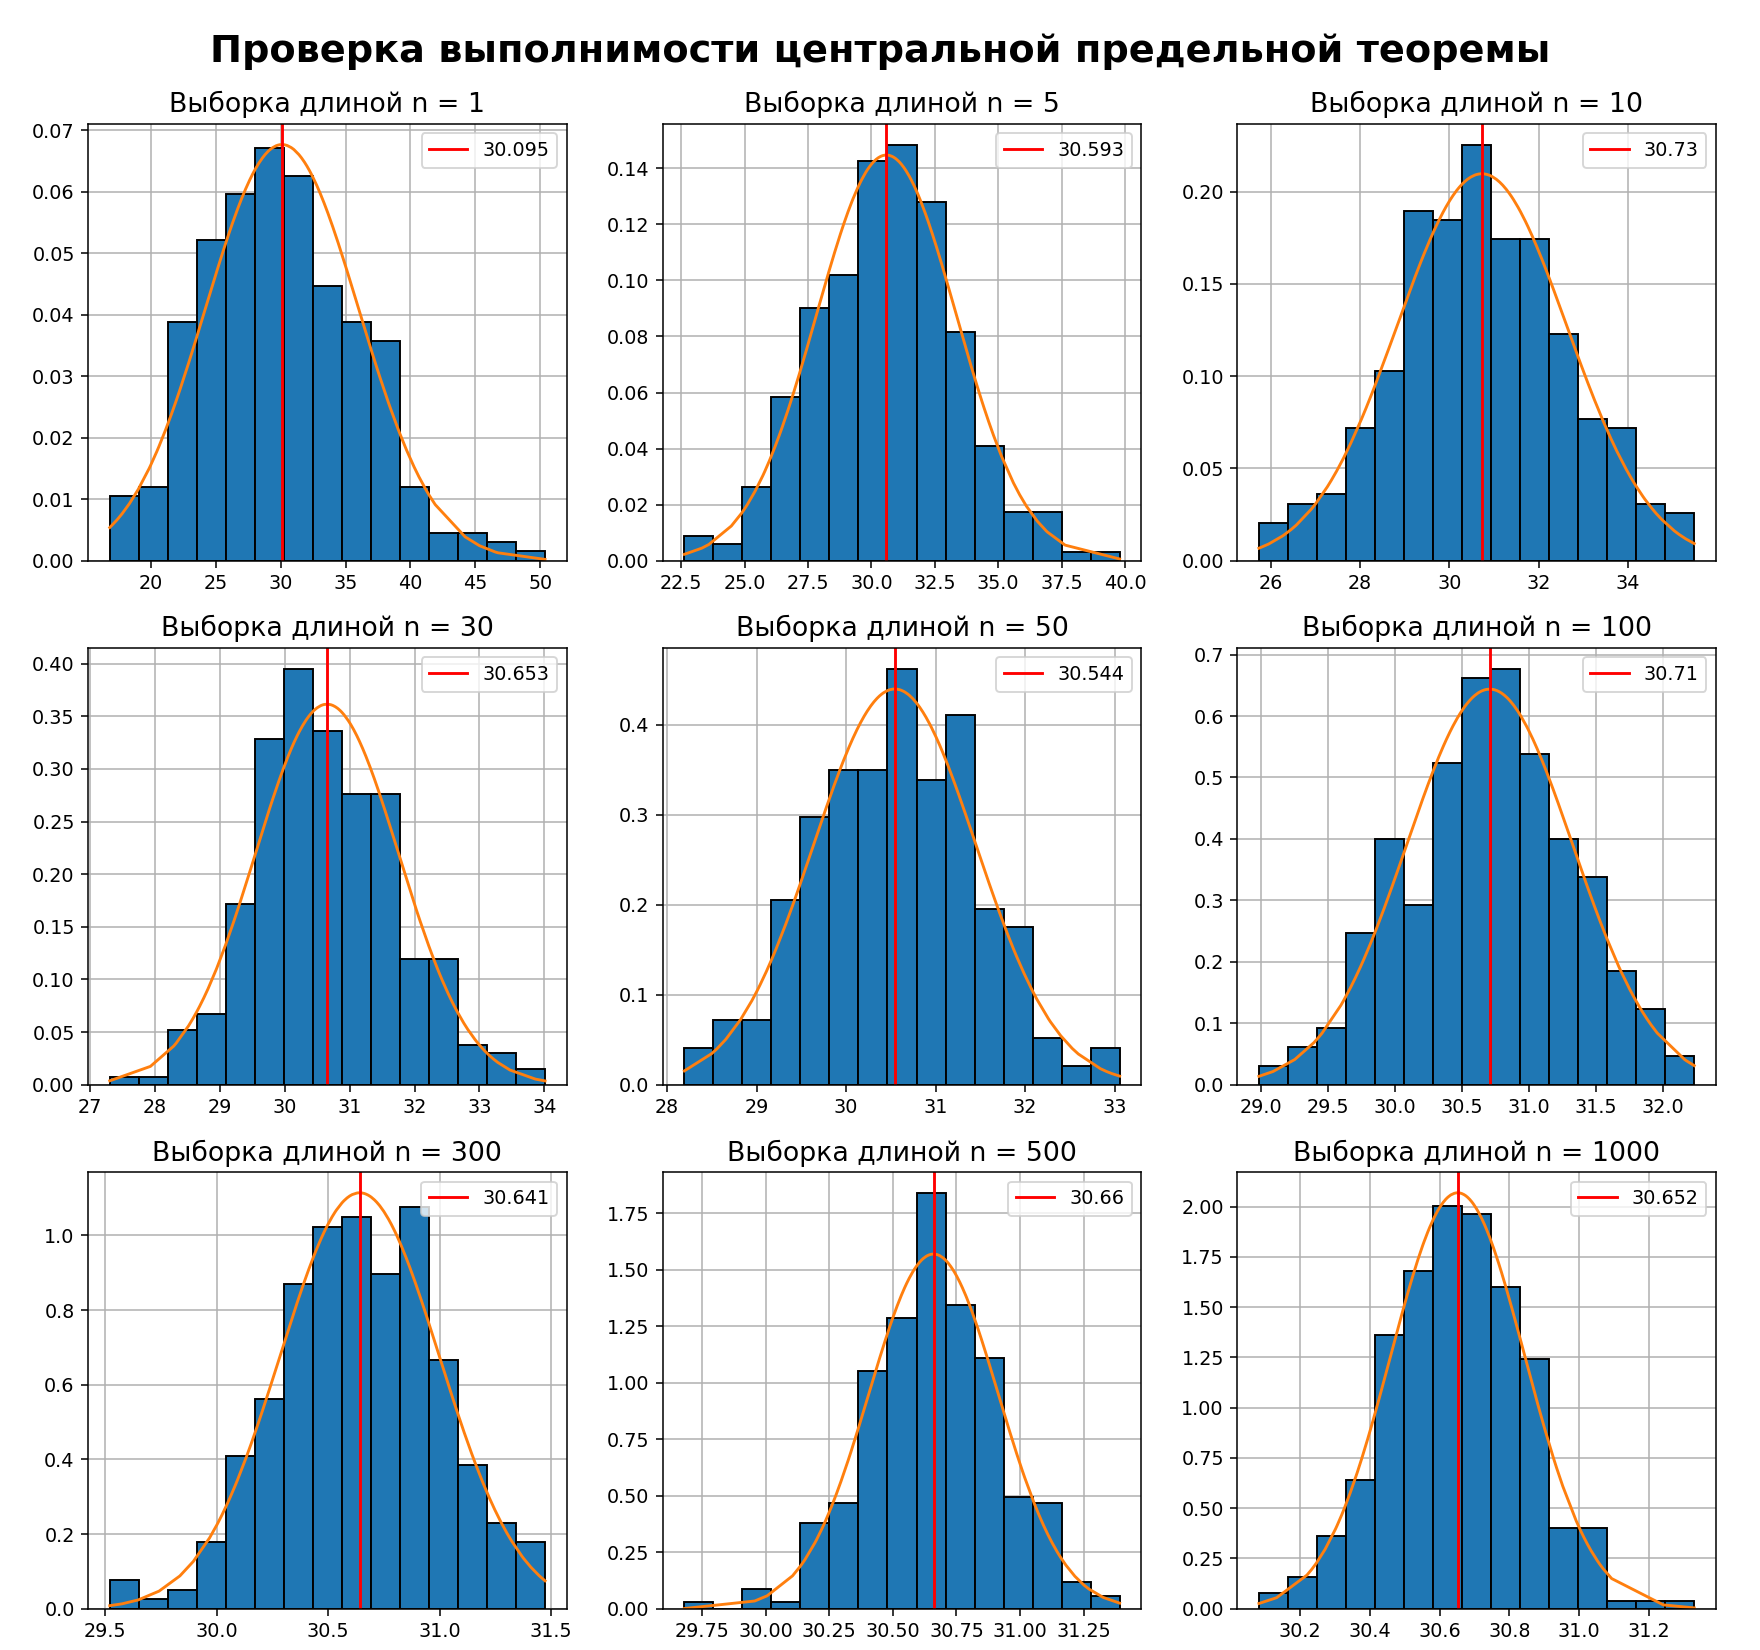

In [15]:
import random as rnd

k, feature = 300, 'bmi' #'charges'
n_smpl = (1, 5, 10, 30, 50, 100, 300, 500, 1000)

means = np.zeros((len(n_smpl), k))
for i, n in enumerate(n_smpl):
    for j in range(k):
        temp = [rnd.choice(db[feature]) for _ in range(n)]
        means[i][j] = np.mean(temp)

fig, axs = plt.subplots(3, 3, figsize=(12.8, 12))

fig.subplots_adjust(0.05, 0.025, 0.975, 0.925)
fig.suptitle('Проверка выполнимости центральной предельной теоремы', fontsize=20, weight='bold')

rslt = []
for i, n in enumerate(n_smpl):
    ax = axs[i // 3][i % 3]
    srt = sorted(means[i])

    mean, std = np.mean(srt), np.std(srt)
    rslt.append([n_smpl[i], mean, std])

    ax.hist(srt, bins=15, density=True, edgecolor='black')
    ax.plot(srt, sts.norm.pdf(srt, mean, std))
    ax.axvline(x=mean, color='red', label=round(mean, 3))

    ax.set_title(f'Выборка длиной n = {n_smpl[i]}', fontsize=14)
    ax.set_axisbelow(True)
    ax.grid(axis='both')
    ax.legend(loc='upper right')

chk = (feature == 'charges')
rslt.append([len(db),
    chrg_mean if chk else bmi_mean,
    chrg_std if chk else bmi_std,
])


И правда, чем больше оказывается длина выборки `n`, тем лучше построенная гистограмма "ложится" на график нормального распределения, построенного по среднему и стандартному отклонению, высчитанным по этой выборке длины `n`.

При этом, среднее значение для выборки с ростом её длины `n` становится все ближе к среднему исходной последовательности.


In [34]:
pd.DataFrame(rslt, columns=['Объем выборки', 'Среднее значение', 'Стандартное отклонение'])

,Объем выборки,Среднее значение,Стандартное отклонение
0,1,30.213200,5.802577
1,5,30.600363,2.744157
2,10,30.542647,1.963599
3,30,30.605701,1.193526
4,50,30.613606,0.808471
5,100,30.636068,0.620200
6,300,30.631238,0.356538
7,500,30.664639,0.260577
8,1000,30.657765,0.190055
9,1338,30.663397,6.098187


Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

In [11]:
k_95, k_99 = 1.96, 2.58

def output(mean: float, se: float, feature: str):
    print(
        f'Среднее значение `{feature}` = {mean}',
        f'Стандартная ошибка среднего = {se}',
        f'  - 95%-ый доверительный интервал: [{mean - (k_95 * se)}; {mean + (k_95 * se)}]',
        f'  - 99%-ый доверительный интервал: [{mean - (k_99 * se)}; {mean + (k_99 * se)}]',
    sep='\n')

In [12]:
chrg_se = chrg_std / np.sqrt(len(db))

output(chrg_mean, chrg_se, 'charges')

Среднее значение `charges` = 13270.422265141257
Стандартная ошибка среднего = 331.0674543156824
  - 95%-ый доверительный интервал: [12621.530054682518; 13919.314475599995]
  - 99%-ый доверительный интервал: [12416.268233006796; 14124.576297275717]


In [13]:
bmi_se = bmi_std / np.sqrt(len(db))

output(bmi_mean, bmi_se, 'bmi')

Среднее значение `bmi` = 30.66339686098655
Стандартная ошибка среднего = 0.1667142315007415
  - 95%-ый доверительный интервал: [30.336636967245095; 30.990156754728]
  - 99%-ый доверительный интервал: [30.233274143714635; 31.093519578258462]


Проверить распределения следующих признаков на нормальность: индекс массы тела (`bmi`), расходы (`charges`).
Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot.
Сделать выводы на основе полученных p-значений.

In [14]:
from matplotlib.gridspec import GridSpec
from scipy.stats import norm as nm

In [15]:
fig = plt.figure(figsize=(12.8, 12))
gs = GridSpec(4, 4)

fig.subplots_adjust(0.05, 0.05, 0.95, 0.925)
fig.suptitle(f'Проверка распределения на нормальность для признака `bmi`', fontsize=20, weight='bold')


qq_plot = fig.add_subplot(gs[1:4, 0:3])
sts.probplot(x=db['bmi'], dist="norm", plot=qq_plot)

qq_plot.set_title('График квантиль-квантиль', fontsize=16)
qq_plot.set_xlabel('Значения стандартного нормального распределения')
qq_plot.set_ylabel('Распределение исследуемой выборки')
qq_plot.set_xticks(np.arange(-4, 5, 1))
qq_plot.set_yticks(np.arange(5, 65, 5))
qq_plot.set_axisbelow(True)
qq_plot.grid(axis='both')


hist_y = fig.add_subplot(gs[0, 0:3])
qntl = sorted(sts.probplot(x=db['bmi'], dist = 'norm', plot = None, fit = False)[0])
hist_y.hist(qntl, bins=17, density=True, color='lightgreen', edgecolor='black', label='Гистограмма')
hist_y.plot(qntl, nm.pdf(qntl, np.mean(qntl), np.std(qntl)))

hist_y.set_title('График нормального распределения', fontsize=16)
hist_y.set_xticks(np.arange(-4, 5, 1))
hist_y.get_xaxis().set_ticklabels([])
hist_y.set_axisbelow(True)
hist_y.grid(axis='x')


hist_x = fig.add_subplot(gs[1:4, 3])
srt = sorted(db['bmi'])
hist_x.hist(srt, bins=17, density=True, color='gold', edgecolor='black', label='Гистограмма', orientation='horizontal')
hist_x.plot(nm.pdf(srt, np.mean(srt), np.std(srt)), srt, label='Распределение')

hist_x.set_title('График распр-ия выборки', fontsize=16)
hist_x.set_yticks(np.arange(5, 65, 5))
hist_x.get_yaxis().set_ticklabels([])
hist_x.set_axisbelow(True)
hist_x.grid(axis='y')


<IPython.core.display.Javascript object>

In [36]:
fig = plt.figure(figsize=(12.8, 12))
gs = GridSpec(4, 4)

fig.subplots_adjust(0.075, 0.05, 0.95, 0.925)
fig.suptitle(f'Проверка распределения на нормальность для признака `charges`', fontsize=20, weight='bold')


qq_plot = fig.add_subplot(gs[1:4, 0:3])
sts.probplot(x=db['charges'], dist="norm", plot=qq_plot)

qq_plot.set_title('График квантиль-квантиль', fontsize=16)
qq_plot.set_xlabel('Значения стандартного нормального распределения')
qq_plot.set_ylabel('Распределение исследуемой выборки')
qq_plot.set_xticks(np.arange(-4, 5, 1))
qq_plot.set_yticks(np.arange(-30000, 80000, 10000))
qq_plot.set_axisbelow(True)
qq_plot.grid(axis='both')


hist_y = fig.add_subplot(gs[0, 0:3])
qntl = sorted(sts.probplot(x=db['charges'], dist = 'norm', plot = None, fit = False)[0])
hist_y.hist(qntl, bins=9, density=True, color='lightgreen', edgecolor='black', label='Гистограмма')
hist_y.plot(qntl, nm.pdf(qntl, np.mean(qntl), np.std(qntl)))

hist_y.set_title('График нормального распределения', fontsize=16)
hist_y.set_xticks(np.arange(-4, 5, 1))
hist_y.get_xaxis().set_ticklabels([])
hist_y.set_axisbelow(True)
hist_y.grid(axis='x')


hist_x = fig.add_subplot(gs[1:4, 3])
srt = sorted(db['charges'])
hist_x.hist(srt, bins=9, density=True, color='gold', edgecolor='black', label='Гистограмма', orientation='horizontal')
hist_x.plot(nm.pdf(srt, np.mean(srt), np.std(srt)), srt, label='Распределение')

hist_x.set_title('График распределения', fontsize=16)
hist_x.set_yticks(np.arange(-30000, 80000, 10000))
hist_x.get_yaxis().set_ticklabels([])
hist_x.set_axisbelow(True)
hist_x.grid(axis='y')


<IPython.core.display.Javascript object>

График распределения для показателя `charges` показывает, что распределение исследуемой выборки сильно отличается от нормального.

На графике распределения для показателя `bmi` середина распределения следует нормальному закону, но его концы отклоняются от него.

Для признака "**индекс массы тела** (`bmi`)":
- Нулевая гипотеза: *"индекс массы тела человека никак не влияет на приобретение им страховки"*
- Альтернативная гипотеза: *"изменение индекса массы тела людей приводит к изменению частоты приобретения ими страховки"*

Для признака "**расходы** (`charges`)":
- Нулевая гипотеза: *"расходы человека никак не влияют на приобретение им страховки"*
- Альтернативная гипотеза: *"изменение расходов людей приводит к изменению частоты приобретения ими страховки"*

In [17]:
params = ['bmi', 'charges']

for j, i in enumerate(params):
    loc, scale = nm.fit(db[i])
    n = nm(loc=loc, scale=scale)

    ks = sts.kstest(db[i], n.cdf)
    chk = ks.pvalue < 0.05
    print(
        f'Результаты KS-теста для признака `{i}`: ',
        f'  - {ks}\n',
        f'Поскольку pvalue={ks.pvalue} {"меньше" if chk else "больше"} 0.05, то ',
        f'  - нулевая гипотеза {"отвергается, принимается АЛЬТЕРНАТИВНАЯ гипотеза" if chk else "НЕ отвергается"};',
        f'  - выборка {"НЕ ИМЕЕТ нормального распределения" if chk else "неплохо СОГЛАСУЕТСЯ с нормальным распределением"}.',
        '\n' if j == 0 else '',
    sep='\n')

Результаты KS-теста для признака `bmi`: 
  - KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394)

Поскольку pvalue=0.31453976932347394 больше 0.05, то 
  - нулевая гипотеза НЕ отвергается;
  - выборка неплохо СОГЛАСУЕТСЯ с нормальным распределением.


Результаты KS-теста для признака `charges`: 
  - KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42)

Поскольку pvalue=4.39305730768502e-42 меньше 0.05, то 
  - нулевая гипотеза отвергается, принимается АЛЬТЕРНАТИВНАЯ гипотеза;
  - выборка НЕ ИМЕЕТ нормального распределения.



Выводы:
- *"индекс массы тела человека никак не влияет на приобретение им страховки"*
- *“изменение расходов людей приводит к изменению частоты приобретения ими страховки”*
